In [1]:
import numpy as np
import vip_hci
from os import mkdir
from os.path import join, sep,exists
import glob
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy import stats
from scipy.ndimage.filters import median_filter
from scipy.ndimage.interpolation import shift
from astropy.table import Table
from matplotlib import colors

In [2]:
# Set up paths 
frameSize = 351
band = 'J'
tg_name= '2M1207'
useRefFrames = False
path_input = './2M1207_bands/Jband/'
path_output = path_input + 'out/'
sep='/'
print(path_input)

path_flats = path_input+'flats'+sep
path_flats_darks = path_input+'flats/darks'+sep
path_sci = path_input+'sci'+sep
path_darks = path_input+'darks'+sep

./2M1207_bands/Jband/


In [3]:
# File list
filelist_flats = glob.glob(path_flats+'*.fits')
filelist_flats_darks = glob.glob(path_flats_darks+'*.fits')
filelist_sci = sorted(glob.glob(path_sci+'*.fits'))
filelist_darks = glob.glob(path_darks+'*.fits')

print((filelist_sci))

['./2M1207_bands/Jband/sci/NACO.2004-04-27T03_31_36.409.fits', './2M1207_bands/Jband/sci/NACO.2004-04-27T03_33_06.008.fits', './2M1207_bands/Jband/sci/NACO.2004-04-27T03_34_32.893.fits', './2M1207_bands/Jband/sci/NACO.2004-04-27T03_36_00.068.fits']


In [4]:
filelist = []
filelist.extend(filelist_flats)
filelist.extend(filelist_flats_darks)
filelist.extend(filelist_sci)
filelist.extend(filelist_darks)
filelist = np.asarray(filelist)

In [5]:
def read_file(file_name):
    return fits.open(file_name)[0].data.astype(float)

def plot_data(obj,percentile = [1, 99],use_log = False):
    if(use_log):
        plt.imshow(obj, origin='lower', cmap='gray', clim=(np.percentile(obj,percentile[0]), np.percentile(obj,percentile[1])),norm=colors.LogNorm())
    else:
        plt.imshow(obj, origin='lower', cmap='gray', clim=(np.percentile(obj,percentile[0]), np.percentile(obj,percentile[1])))
    plt.colorbar()
    #plt.ylim(200,600)

In [6]:
Obslog = Table(
                    names=("File", "UTC", "objid", "exptime"
                    ),
                    meta={"name": "Observation Log"},
                    dtype=("U64", "U64", "U64", "float64"
                          )
                    )
for i in filelist:
      open_file = fits.open(i)
      header_file = open_file[0].header
      row = [i, header_file["DATE-OBS"], header_file["OBJECT"], header_file["EXPTIME"]]
      Obslog.add_row(row)
Obslog

File,UTC,objid,exptime
str66,str64,str64,float64
./2M1207_bands/Jband/flats/NACO.2004-04-25T22_32_53.451.fits,2004-04-25T22:32:53.4510,Object name not set,0.4
./2M1207_bands/Jband/flats/NACO.2004-04-25T22_30_18.379.fits,2004-04-25T22:30:18.3794,Object name not set,0.4
./2M1207_bands/Jband/flats/NACO.2004-04-25T22_31_55.286.fits,2004-04-25T22:31:55.2865,Object name not set,0.4
./2M1207_bands/Jband/flats/NACO.2004-04-25T22_34_28.354.fits,2004-04-25T22:34:28.3539,Object name not set,0.4
./2M1207_bands/Jband/flats/NACO.2004-04-25T22_32_34.478.fits,2004-04-25T22:32:34.4778,Object name not set,0.4
./2M1207_bands/Jband/flats/NACO.2004-04-25T22_32_14.690.fits,2004-04-25T22:32:14.6895,Object name not set,0.4
./2M1207_bands/Jband/flats/NACO.2004-04-25T22_30_38.157.fits,2004-04-25T22:30:38.1571,Object name not set,0.4
./2M1207_bands/Jband/flats/NACO.2004-04-25T22_35_27.745.fits,2004-04-25T22:35:27.7443,Object name not set,0.4
./2M1207_bands/Jband/flats/NACO.2004-04-25T22_29_18.985.fits,2004-04-25T22:29:18.9850,Object name not set,0.4


In [7]:
np.unique(Obslog["exptime"])

0.4
30.0


In [8]:
fb_exptime = 0.4
sb_exptime = 30.0

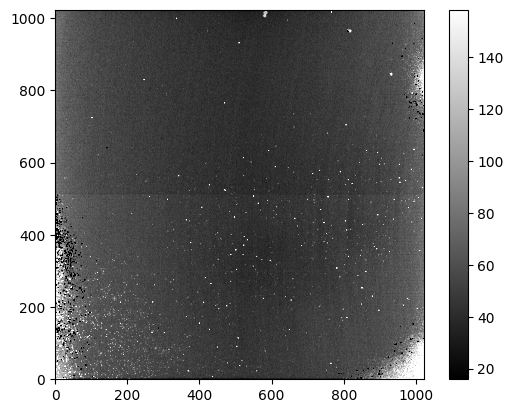

In [9]:
flats_darks = []
for i in filelist_flats_darks:
    flats_darks.append(read_file(i) / fb_exptime)
flats_darks = np.asarray(flats_darks)
flats_darks_master = np.median(flats_darks, axis = 0)
plot_data(flats_darks_master)
hot_pixel = flats_darks_master > 5 * np.median(flats_darks_master)

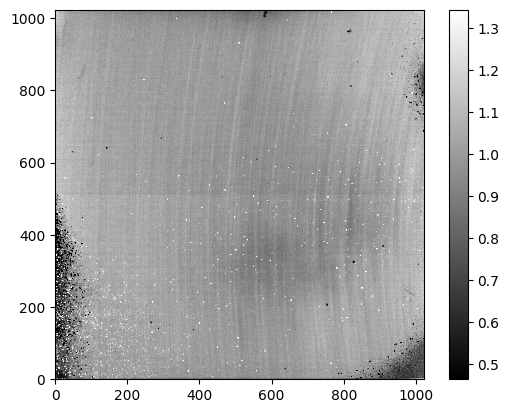

In [10]:
flats = []
for i in filelist_flats:
    flats.append(read_file(i) / fb_exptime)
flats = np.asarray(flats)
flats_master = np.median(flats, axis = 0)
flats_master_norm = flats_master / np.median(flats_master)
plot_data(flats_master_norm)
cold_pixel = flats_master_norm < 0.7

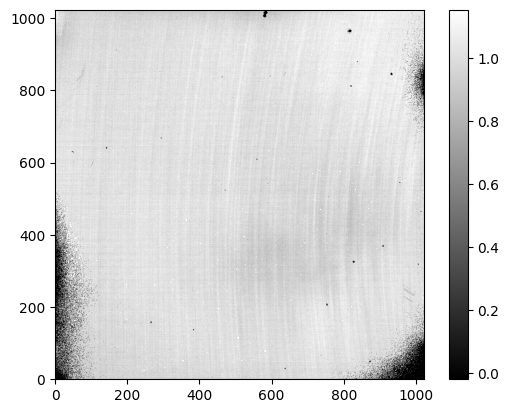

In [11]:
#plot_data(flats_master - flats_darks_master)
true_master_flat = (flats_master - flats_darks_master) / np.median(flats_master - flats_darks_master)
plot_data(true_master_flat)

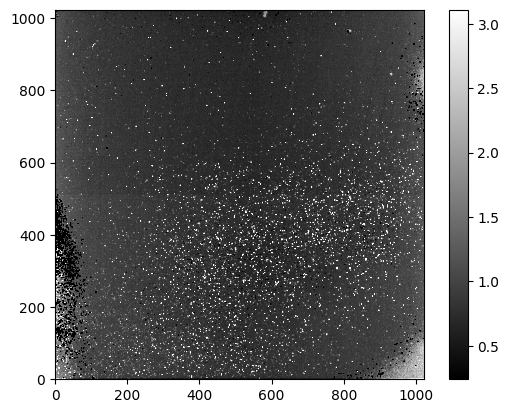

In [12]:
sci_darks = []
for i in filelist_darks:
    sci_darks.append(read_file(i) / sb_exptime)
sci_darks = np.asarray(sci_darks)
sci_darks_master = np.median(sci_darks, axis = 0)
plot_data(sci_darks_master)

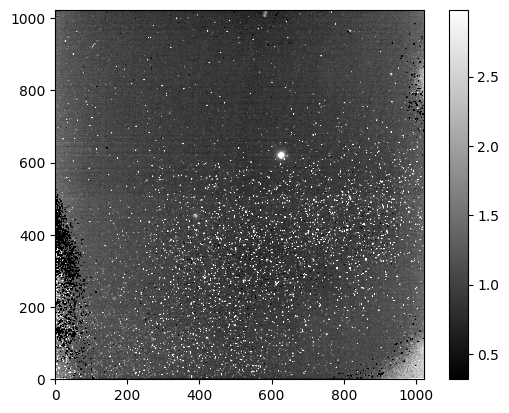

In [13]:
sci = []
for i in filelist_sci:
    sci.append(read_file(i) / sb_exptime)
sci = np.asarray(sci)
plot_data(sci[0])

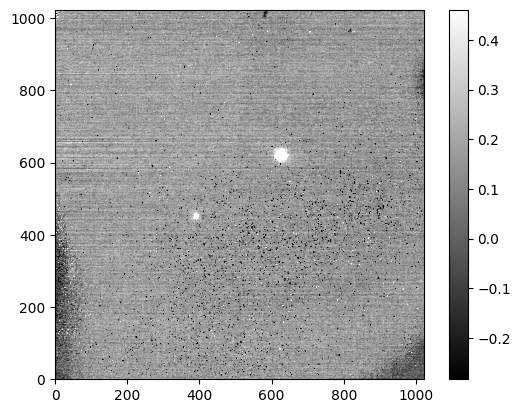

In [14]:
plot_data(sci[0] - sci_darks_master)

/tmp/ipykernel_118593/3401154916.py:1: RuntimeWarning: divide by zero encountered in divide
  sci_array = (sci - sci_darks_master)/true_master_flat
/tmp/ipykernel_118593/3401154916.py:1: RuntimeWarning: invalid value encountered in divide
  sci_array = (sci - sci_darks_master)/true_master_flat


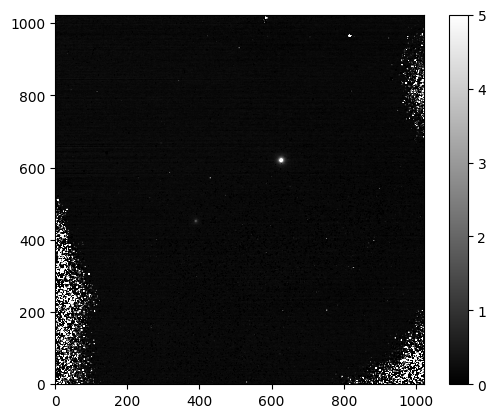

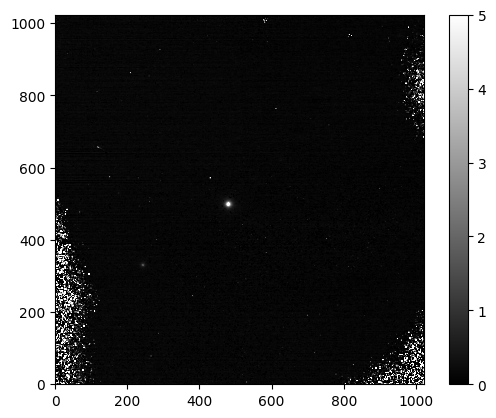

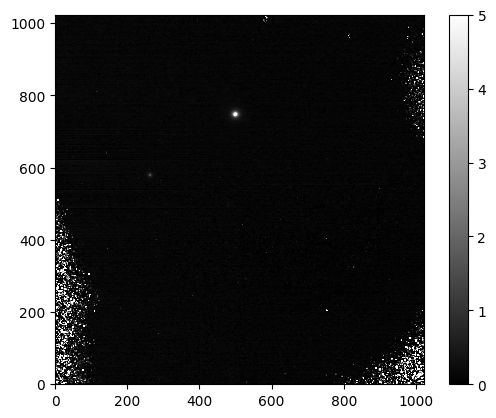

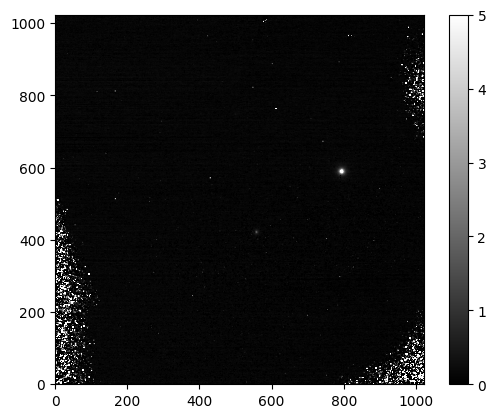

/home/xhall/miniconda3/envs/ay-ge_107/lib/python3.10/site-packages/numpy/core/_methods.py:180: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


In [15]:
sci_array = (sci - sci_darks_master)/true_master_flat
for i in sci_array:
    plt.imshow(i, origin='lower', cmap='gray', vmin = 0, vmax = 5)
    plt.colorbar()
    plt.show()
sci_master = np.median(sci_array, axis = 0)

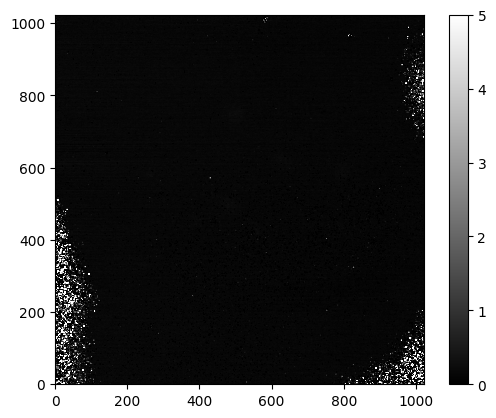

In [16]:
plt.imshow(sci_master, origin='lower', cmap='gray', vmin = 0, vmax = 5)
plt.colorbar()
plt.show()

In [17]:
bad_pixel = hot_pixel + cold_pixel
bad_pixel

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True, False, ...,  True,  True,  True],
       [ True,  True,  True, ..., False,  True,  True],
       ...,
       [False, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False,  True],
       [False,  True,  True, ...,  True,  True,  True]])

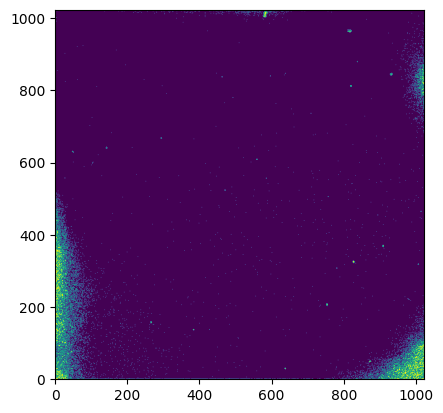

In [18]:
plt.imshow(bad_pixel, origin = "lower")

In [19]:
sci_cube = []
for i in sci_array:
    i -= sci_master
    i[bad_pixel] = np.nan
    sci_cube.append(i)
sci_cube = np.asarray(sci_cube)

/tmp/ipykernel_118593/270270956.py:3: RuntimeWarning: invalid value encountered in subtract
  i -= sci_master


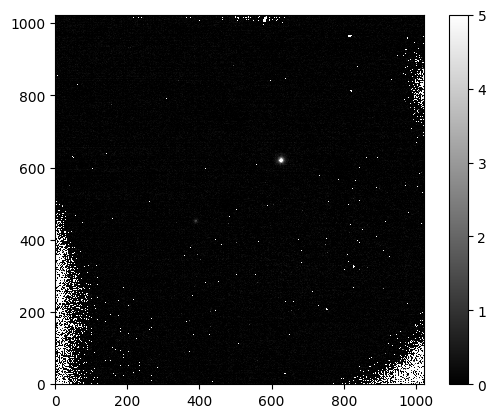

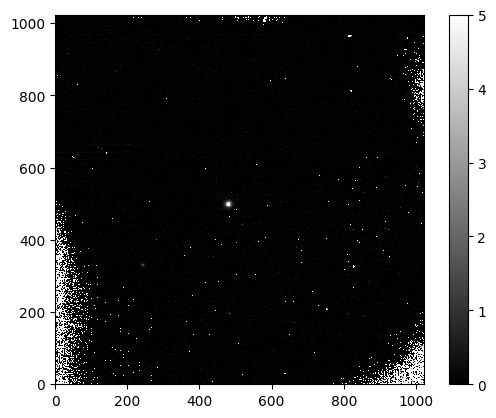

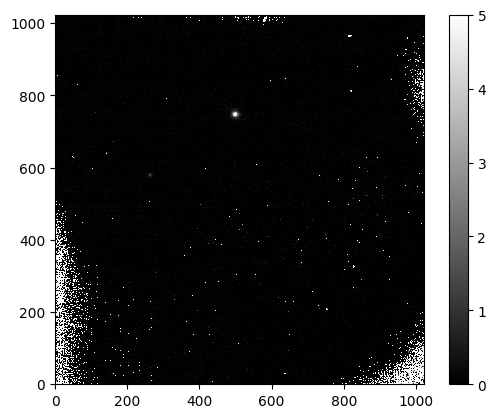

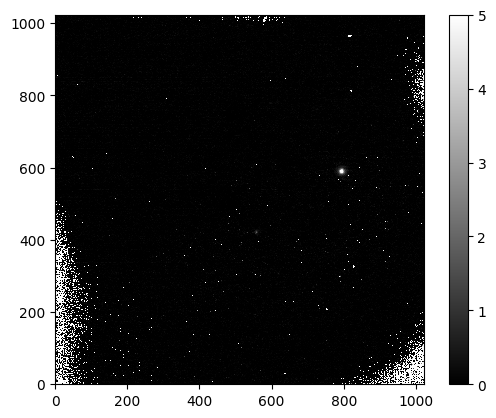

In [20]:
for i in sci_cube:
    plt.imshow(i, origin='lower', cmap='gray', vmin = 0, vmax = 5, interpolation = "nearest")
    plt.colorbar()
    plt.show()

In [21]:
sci_cube.shape

(4, 1024, 1024)

In [22]:
sci_header_tmp=[]
shiftx_tmp=[]
shifty_tmp=[]
for filename in filelist_sci:
    hdu = fits.open(filename)[0]
    sci_header_tmp.append(hdu.header) # read headers including pointing offsets
    shiftx_tmp.append(hdu.header['HIERARCH ESO SEQ CUMOFFSETX'])
    shifty_tmp.append(hdu.header['HIERARCH ESO SEQ CUMOFFSETY'])

In [23]:
crop = 768
dimx = sci_cube.shape[1]
dimy = sci_cube.shape[2]
x1 = int((sci_cube.shape[1] - crop)/2)
x2 = int(x1 + crop)
y1 = int((sci_cube.shape[2] - crop)/2)
y2 = int(y1 + crop)
sci_cube_cropped = sci_cube[:,x1:x2,y1:y2]
sci_cube_cropped.shape

(4, 768, 768)

In [24]:
sci_cube_shifted = np.copy(sci_cube_cropped)
for i in range(len(sci_cube_cropped)):
    dummy = sci_cube_cropped[i,:,:]
    print(shiftx_tmp[i],shifty_tmp[i])
    sci_cube_shifted[i,:,:] = shift(dummy,[-shifty_tmp[i],-shiftx_tmp[i]], order=1)

0.0 0.0
-143.0 -120.0
-124.0 125.0
164.0 -30.0


In [25]:
sci_cube_shiftedb = np.copy(sci_cube_shifted)

cx=int(crop/2)
cy=int(crop/2)
for i in range(len(sci_cube_shiftedb)):
    dummy = sci_cube_shiftedb[i,:,:]
    max_coord = np.unravel_index(np.nanargmax(dummy, axis=None), dummy.shape)
    print(np.unravel_index(np.nanargmax(dummy, axis=None), dummy.shape))
    shiftx = cx-max_coord[0]
    shifty = cy-max_coord[1]
    print(shiftx,shifty)
    sci_cube_shiftedb[i,:,:] = shift(dummy,[shiftx,shifty], order=1)

(491, 497)
-107 -113
(489, 494)
-105 -110
(493, 495)
-109 -111
(490, 501)
-106 -117


In [26]:
final_image = np.median(sci_cube_shiftedb[0:3,:,:],axis=0)

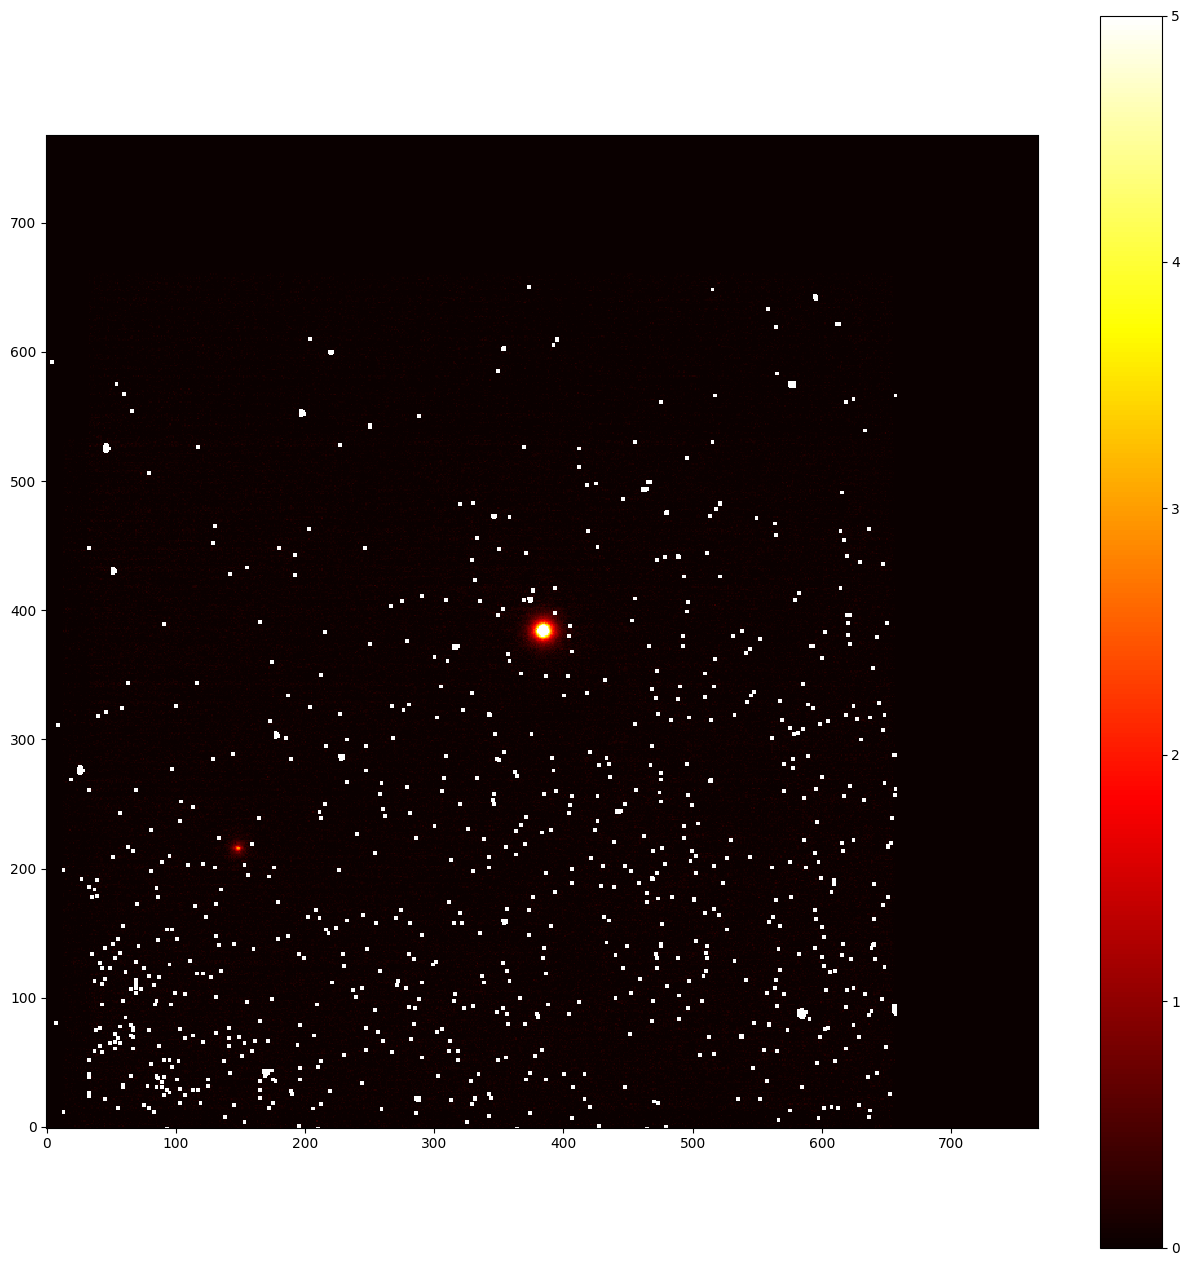

In [27]:
plt.figure(figsize=(16,16))
plt.imshow(final_image,vmin=0,vmax=5,cmap='hot', interpolation = "nearest", origin = "lower")
plt.colorbar()

In [28]:
crop = 128
dimx = final_image.shape[0]
dimy = final_image.shape[1]
x1 = int((dimx - crop)/2)
x2 = int(x1 + crop)Trump and Blanche have been chatting on and off for the past few minutes, with both of them smiling and laughing at points. A couple times when he and Blanche stopped talking, Trump would reach out and lightly swat Blanche's arm to get his attention and then they'd start talking again.
final_image_cropped = final_image[x1:x2,y1:y2]
final_image_cropped.shape

(128, 128)

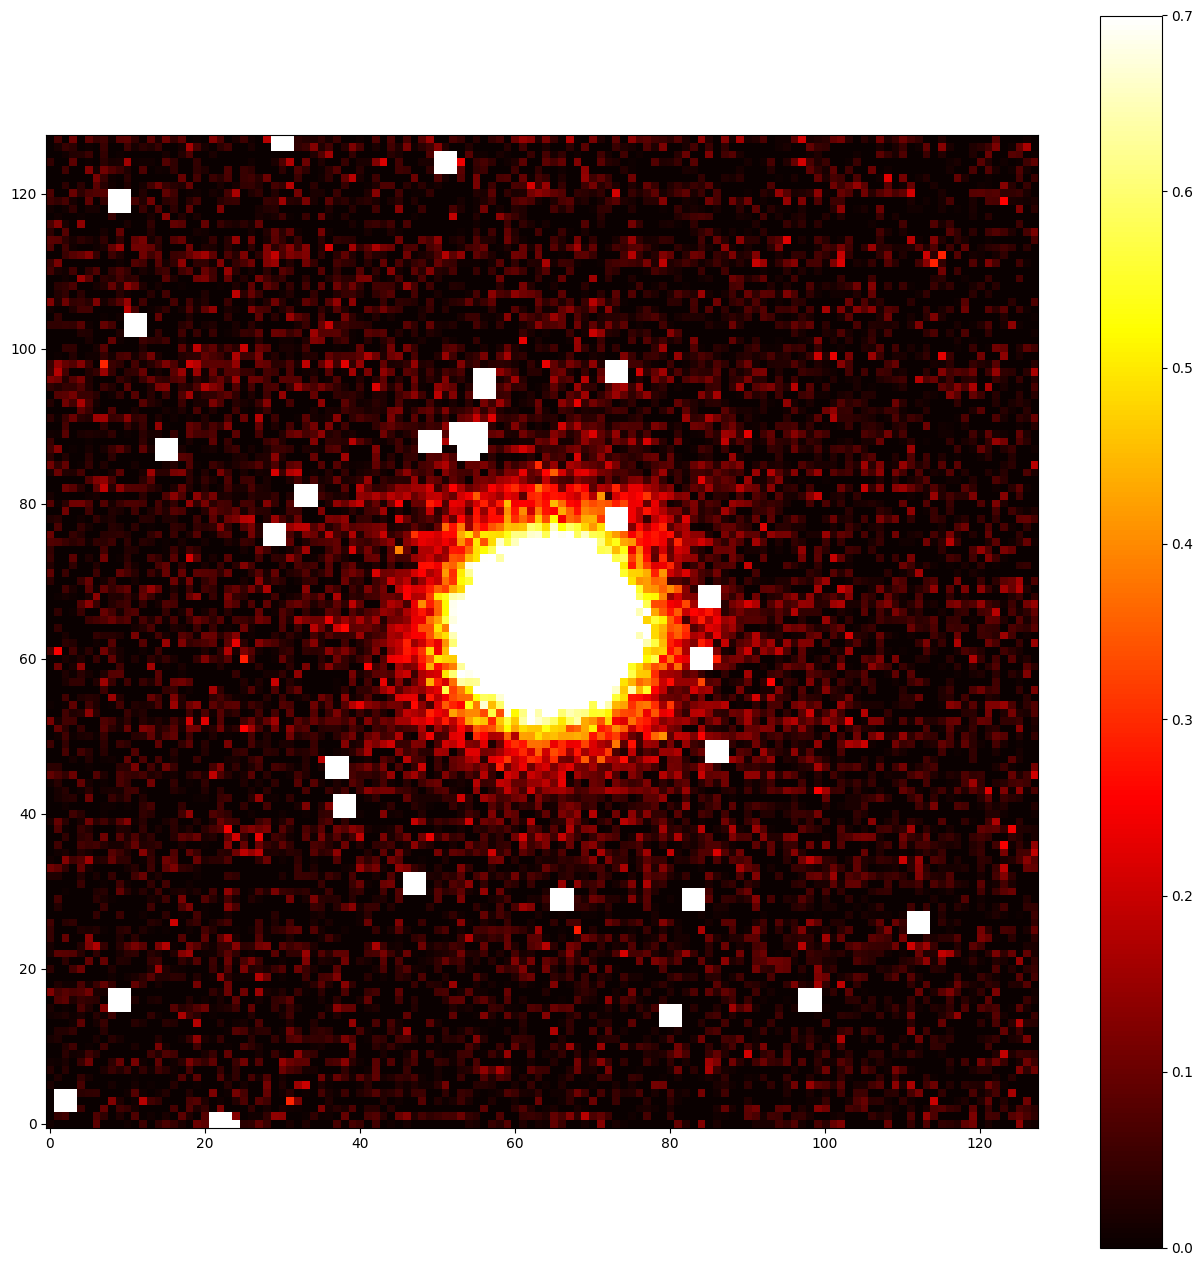

In [29]:
plt.figure(figsize=(16,16))
plt.imshow(final_image_cropped,vmin=0,vmax=0.7,cmap='hot', origin = "lower")
plt.colorbar()

In [30]:
import copy

In [31]:
final_image_cropped_nonan = copy.deepcopy(final_image_cropped)
final_image_cropped_nonan[np.isnan(final_image_cropped)] = np.nanmedian(final_image_cropped)

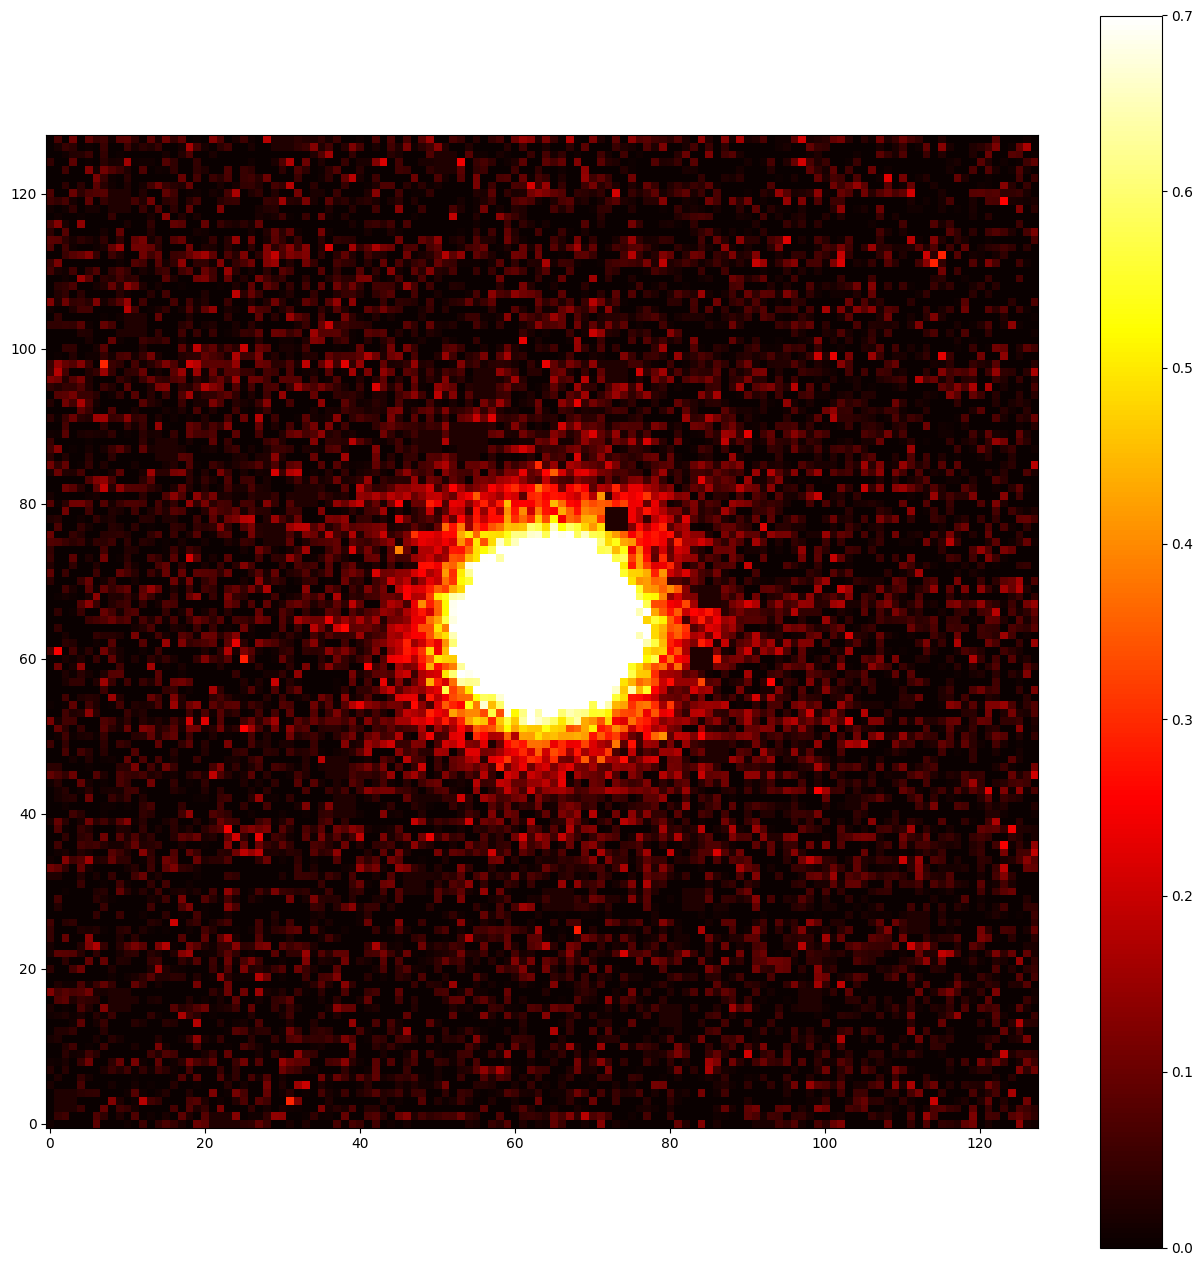

In [32]:
plt.figure(figsize=(16,16))
plt.imshow(final_image_cropped_nonan,vmin=0,vmax=0.7,cmap='hot', origin = "lower")
plt.colorbar()

In [33]:
from photutils import DAOStarFinder
bkg_sigma = np.nanmedian(np.absolute(final_image_cropped - np.nanmedian(final_image_cropped)))
daofind = DAOStarFinder(fwhm=4,threshold=7.*bkg_sigma)  # use 12x background_sigma
sources = daofind(final_image_cropped_nonan)  ## find sources in image
for col in sources.colnames:
    sources[col].info.format = '%.8g' # formatting trick for consistent table output
print(sources)

 id xcentroid ycentroid sharpness  ... sky    peak      flux      mag    
--- --------- --------- ---------- ... --- --------- --------- ----------
  1 64.184415 64.073704 0.58814009 ...   0 26.966679 73.810506 -4.6702954


In [34]:
from photutils import aperture_photometry, CircularAperture
positions = np.transpose((sources['xcentroid'], sources['ycentroid']))
apertures = CircularAperture(positions, r=4.)
phot_table = aperture_photometry(final_image_cropped_nonan, apertures)
for col in phot_table.colnames:
    phot_table[col].info.format = '%.8g'
print(phot_table)
print('\n')
print(f"Brown Dwarf Aperture Sum: {phot_table['aperture_sum'][0]}")
print(f"Planet Aperture Sum: {phot_table['aperture_sum'][0]}")

 id  xcenter   ycenter  aperture_sum
       pix       pix                
--- --------- --------- ------------
  1 64.184415 64.073704    472.60722


Brown Dwarf Aperture Sum: 472.6072214388467
Planet Aperture Sum: 472.6072214388467


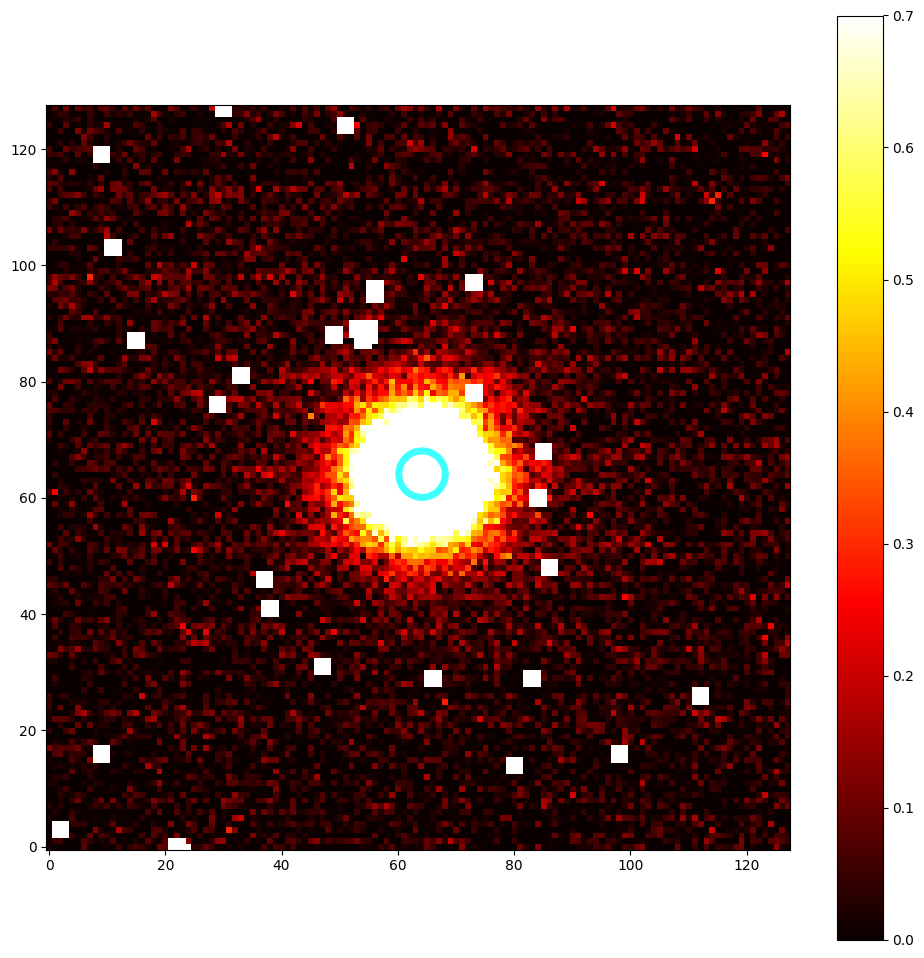

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.imshow(final_image_cropped,vmin=0,vmax=0.7,cmap='hot',origin='lower')
apertures.plot(color='cyan',lw=5,alpha=0.75)
plt.colorbar()

In [36]:
#flux_ratio = 16725.869 / 192.28016
flux_ratio = phot_table['aperture_sum'][1] / phot_table['aperture_sum'][0]
print(flux_ratio)

IndexError: index 1 is out of bounds for axis 0 with size 1

In [ ]:
mag_difference = 2.5*np.log10(flux_ratio)
print(mag_difference)

5.025007571040019


In [ ]:
k_mag_brown_dwarf = 11.945
k_mag_planet = k_mag_brown_dwarf + mag_difference
print(k_mag_planet)

16.97000757104002
